Load & Explore Dataset

In [2]:
#Step 1: Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.preprocessing import StandardScaler

#Step 2: Load the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

print(data.head())
print("=================================")
print(data.info())
print("=================================")
print(data.describe())
print("=================================")
print(data.isnull().sum())
print("=================================")
print(data.duplicated().sum())
print("=================================")
print(data.columns)
print("=================================")
print(data.nunique())
print("=================================")
print(data.dtypes)
print("=================================")
print(data.corr())
print("=================================")
print(data.shape)

#Step 3: Data Preprocessing

X = data.drop(columns=['Channel', 'Region'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

📂 Step 2: Build Dendrogram

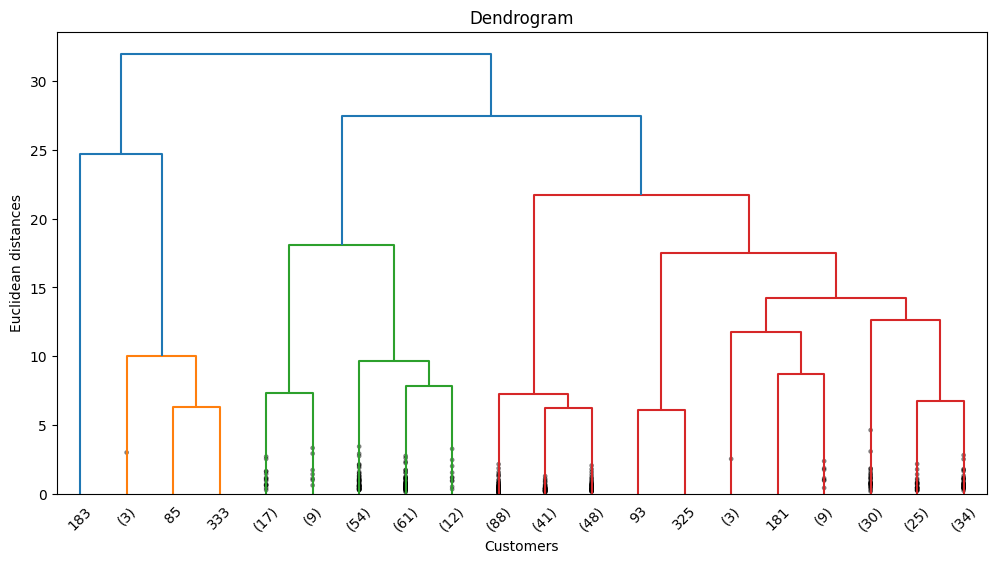

In [3]:
# Perform hierarchical clustering (linkage matrix)

linked = linkage(X_scaled, method='ward')

#Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(linked,truncate_mode='lastp',p=20,leaf_rotation=45,leaf_font_size=10,show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

📂 Step 3: Apply Agglomerative Clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

# Let's say we want 3 clusters (you can decide from dendrogram)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

# Add cluster labels to data
data["Cluster"] = labels
print(data.groupby("Cluster").mean())


          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.833333  2.833333  27477.000000  43542.166667  54588.500000   
1        1.085409  2.533808  15048.932384   3017.298932   3791.761566   
2        1.738562  2.549020   5794.241830   9419.888889  13761.738562   

              Frozen  Detergents_Paper    Delicassen  
Cluster                                               
0        8285.666667      25018.333333  10247.833333  
1        3837.316726        758.007117   1309.900356  
2        1461.764706       5913.379085   1577.607843  


📂 Step 4: Visualize Clusters (2D with PCA)

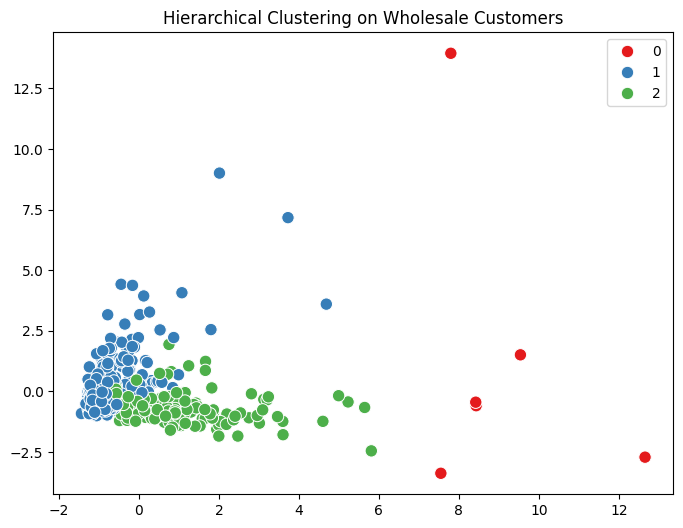

In [7]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1", s=80)
plt.title("Hierarchical Clustering on Wholesale Customers")
plt.show()


📂 Step 5: Insights

From the dendrogram, you decide optimal number of clusters.

Each cluster shows different spending habits. Example:

Cluster 0 → High Grocery & Detergents buyers (likely Retail Shops).

Cluster 1 → High Fresh spenders (likely Hotels/Restaurants).

Cluster 2 → Balanced spenders (small businesses).